In [24]:
import numpy as np
import pandas as pd
np.random.seed(19680801)
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import random
%matplotlib inline

In [8]:
df = pd.DataFrame({
        'SqueezeNet' : [90.71, 23902388, 730314],
        'MobileNet x0.25' : [85.87, 3539456, 215642],
        'MobileNet x1.00' : [91.42, 47187968, 3217226],
        'Fd-MobileNet x1.00': [87.730, 11983872, 1886538],
        'Fd-MobileNet x0.25' : [79.09, 1029888, 128730],
        'MobileNet V3 x1.00' : [91.16, 18891842,  1518594],
        'MobileNet V3 x0.25' : [86.33, 2540820, 124050],
        'MicroBotNet x1.00' : [84.19, 6597218, 2044298],
        'MicroBotNet x0.32' : [79.35, 932886, 236658],
        'MicroBotNet x0.25' : [77.99, 697662, 160162],
        'TQ-MicroBotNet x0.32' : [72.3, 403940, 160162]
    },
    index = ['Accuracy', 'MACs', 'Parameters']).T
pd.options.display.float_format = '{:,}'.format
df.sort_values(by=['MACs'], axis=0, ascending=False)

,Accuracy,MACs,Parameters
MobileNet x1.00,91.42,"47,187,968.0","3,217,226.0"
SqueezeNet,90.71,"23,902,388.0","730,314.0"
MobileNet V3 x1.00,91.16,"18,891,842.0","1,518,594.0"
Fd-MobileNet x1.00,87.73,"11,983,872.0","1,886,538.0"
MicroBotNet x1.00,84.19,"6,597,218.0","2,044,298.0"
MobileNet x0.25,85.87,"3,539,456.0","215,642.0"
MobileNet V3 x0.25,86.33,"2,540,820.0","124,050.0"
Fd-MobileNet x0.25,79.09,"1,029,888.0","128,730.0"
MicroBotNet x0.32,79.35,"932,886.0","236,658.0"
MicroBotNet x0.25,77.99,"697,662.0","160,162.0"


In [66]:
colors = ['m', 'g', 'tab:brown', 'c', 'b', 'k', 'tab:orange', 'tab:purple', 'r', 'tab:pink', 'tab:gray']
print('num colors: %d' % len(colors))

#plt.rcParams["font.family"] = "Times"

num colors: 11


In [67]:
def get_config(i, model):
        
    scale = 200.0 if 'MicroBotNet' in model else 100.0

    marker = None
    if 'MicroBotNet' in model:
        marker = '*'
    elif 'MobileNet' in model:
        marker = 'o'
    else:
        assert 'SqueezeNet' in model
        marker = 's'
    color = colors[i % 10]
    return scale, marker, color
get_config(0, df.index[-1])

(200.0, '*', 'm')

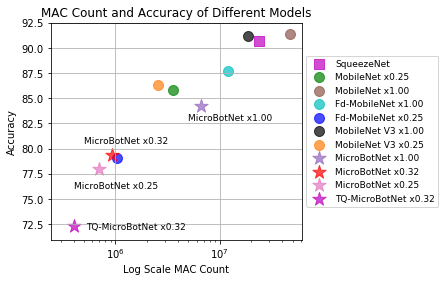

In [105]:
fig, ax = plt.subplots()
arr = df[['Accuracy', 'MACs']].to_numpy()
for i, model in enumerate(df.index):
    y, x = arr[i]
    scale, marker, color = get_config(i, model)
    ax.scatter(x, y, c=color, s=scale, marker=marker, label=model,
               alpha=0.7) # gives a faded color

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
ax.grid(True)
ax.set_xscale('log')

# text
ax.text(5e6, 82.8, 'MicroBotNet x1.00', fontsize=9)
ax.text(5e5, 80.5, 'MicroBotNet x0.32', fontsize=9)
ax.text(4e5, 76, 'MicroBotNet x0.25', fontsize=9)
ax.text(5.2e5, 72, 'TQ-MicroBotNet x0.32', fontsize=9)

plt.title('MAC Count and Accuracy of Different Models')
plt.xlabel('Log Scale MAC Count')
plt.ylabel('Accuracy')
plt.savefig('log_mac.pdf')
plt.show()


's'

# Older Stuff

AssertionError: 

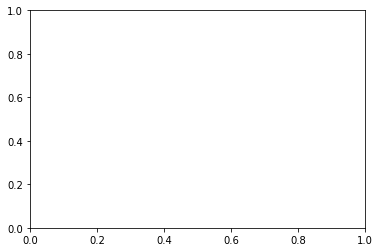

In [20]:
fig, ax = plt.subplots()
assert len(df.index)  <= 10
arr = df[['Accuracy', 'MACs']].to_numpy()
for i, model in enumerate(df.index):
    y, x = arr[i]
    scale = 200.0 if 'MicroBotNet' in model else 100.0
    marker='*' if 'MicroBotNet' in model else 'o'
    ax.scatter(x, y, c=colors[i], s=scale, marker=marker, label=model,
               alpha=0.5) # gives a faded color

ax.legend(loc='lower right')
ax.grid(True)
#ax.set_ylim(70, 92)
plt.title('MAC Count and Accuracy of Different Models')
plt.xlabel('MAC Count')
plt.ylabel('Accuracy')
plt.show()

AssertionError: 

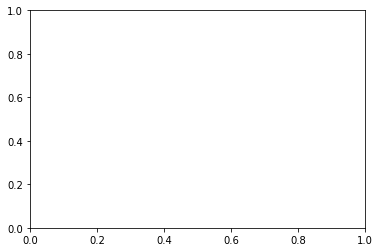

In [21]:
fig, ax = plt.subplots()
assert len(df.index) <= 10
arr = df[['Accuracy', 'MACs']].to_numpy()
for i, model in enumerate(df.index):
    y, x = arr[i]
    scale = 200.0 if 'MicroBotNet' in model else 100.0
    marker='*' if 'MicroBotNet' in model else 'o'
    ax.scatter(x, y, c=colors[i], s=scale, marker=marker, label=model,
               alpha=0.5) # gives a faded color

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
ax.grid(True)
ax.set_xscale('log')

plt.title('MAC Count and Accuracy of Different Models')
plt.xlabel('Log Scale MAC Count')
plt.ylabel('Accuracy')
plt.savefig('log_mac.pdf')
plt.show()


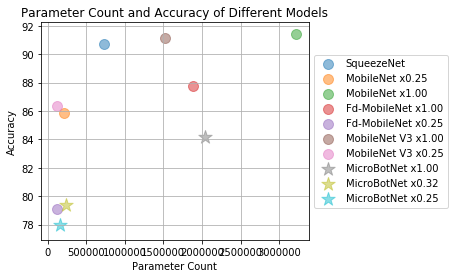

In [61]:
fig, ax = plt.subplots()
assert len(df.index)  <= 10
arr = df[['Accuracy', 'Parameters']].to_numpy()
for i, model in enumerate(df.index):
    y, x = arr[i]
    scale = 200.0 if 'MicroBotNet' in model else 100.0
    marker='*' if 'MicroBotNet' in model else 'o'
    ax.scatter(x, y, c=colors[i], s=scale, marker=marker, label=model,
               alpha=0.5) # gives a faded color

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
plt.title('Parameter Count and Accuracy of Different Models')
plt.xlabel('Parameter Count')
plt.ylabel('Accuracy')
plt.show()

In [62]:
# how to place legends outside https://matplotlib.org/3.1.0/gallery/userdemo/simple_legend01.html#sphx-glr-gallery-userdemo-simple-legend01-py